In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
def clean_tensor_columns(file_path, columns):
    df = pd.read_csv(filepath_or_buffer=file_path)
    for col in columns:
        df[col] = df[col].str.extract(r'tensor\((.+)\)')[0].astype(float)
    return df

file_path = './data/results.csv'
columns_to_clean = ["precision", "recall", "f1"]
df = clean_tensor_columns(file_path, columns_to_clean)
print(df.head())

                                            question  \
0  What types of road improvements are planned fo...   
1  How did the average miles per shipment for sin...   
2  What is the total greenhouse gas reduction in ...   
3  What is the importance of accurate estimation ...   
4  What are some potential vulnerabilities of und...   

                                            contexts  \
0  [Document(id=f95bc20f333ffa6abfc9a89b3ea378153...   
1  [Document(id=cfda495d08550cdd689d57fea5aee07d1...   
2  [Document(id=5e3f402db9ce4879a4ef7f09e76e890f0...   
3  [Document(id=66620ade4dde9d9557bf1ab9a84a99598...   
4  [Document(id=4a2898531fc133b3838e33341136891bb...   

                                              answer  \
0  ['Additional lanes', 'Standard overlay/ADA imp...   
1  ['For truck, it increased from 144 to 206 mile...   
2                                         ['80,829']   
3  ['All around the world, system operators and u...   
4  ['vulnerability to extreme seismic events',

In [34]:
from bert_score import score

def compute_bertscore(prediction: str, reference: str) -> tuple:
    #Inputs have to be lists so wrap them 
    predictions = [prediction]
    references = [reference]

    results = score(predictions, references, lang='en')

    precision = results[0].item()
    recall = results[1].item()
    f1 = results[2].item()
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)  

    return precision, recall, f1

# Example usage:
prediction = 'The text emphasizes the importance of accurate estimation of available PV power for several reasons: Grid reliability, accurate estimation is crucial for grid operators...'
reference = 'All around the world, system operators and utilities are continually adapting their grid codes, interconnection requirements...'

precision, recall, f1 = compute_bertscore(prediction, reference)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.8663163185119629
Recall: 0.8742483854293823
F1 Score: 0.8702642917633057


In [ ]:
df.columns

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Precision: 0.8663163185119629
Recall: 0.8742483854293823
F1 Score: 0.8702642917633057


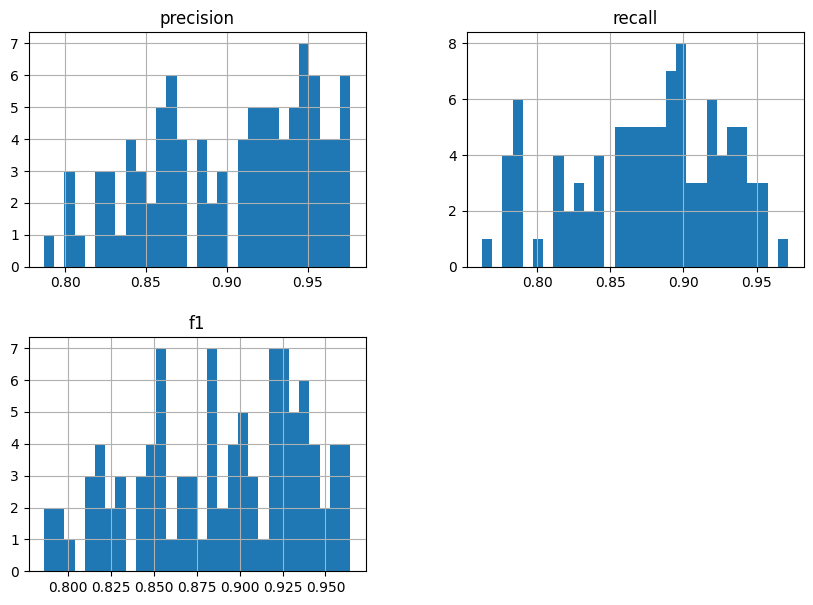

In [19]:
df[['precision', 'recall', 'f1']].hist(bins=30, figsize=(10, 7))

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show()

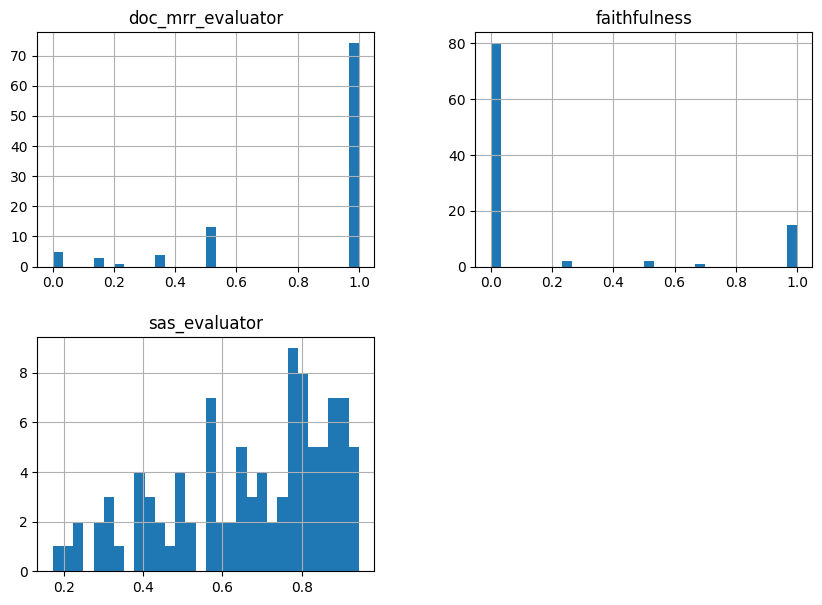

In [27]:
#Histograms
df[['doc_mrr_evaluator', 'faithfulness', 'sas_evaluator']].hist(bins=30, figsize=(10, 7))

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')

plt.show()

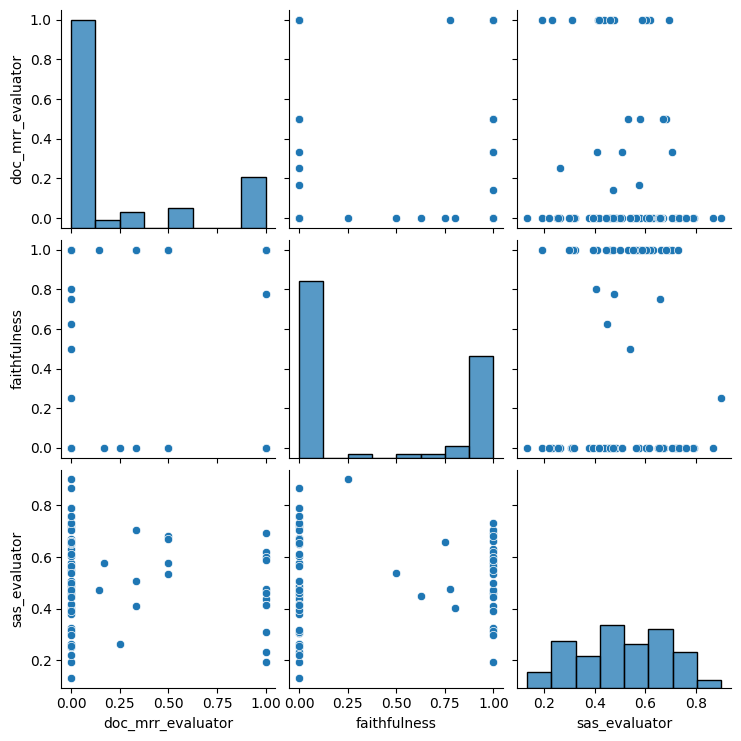

In [ ]:
#Pairplots
import seaborn as sns
sns.pairplot(df[['doc_mrr_evaluator', 'faithfulness', 'sas_evaluator']])

In [ ]:
#Covariance Matrix
columns_to_check = ['doc_mrr_evaluator', 'faithfulness', 'sas_evaluator']
cov_matrix = df[columns_to_check].cov()

print(cov_matrix)

                   doc_mrr_evaluator  faithfulness  sas_evaluator
doc_mrr_evaluator           0.143611      0.032981      -0.007053
faithfulness                0.032981      0.224378       0.004352
sas_evaluator              -0.007053      0.004352       0.031605
